# BEE 4750 Homework 2: Dissolved Oxygen

**Name**:

**ID**:

> **Due Date**
>
> Friday, 09/22/23, 9:00pm

## Overview

### Instructions

This assignment asks you to use a simulation model for dissolved oxygen
to assess the impacts of two wastewater streams, including minimum
treatment levels and the impact of uncertain environmental conditions.
You will also be asked to identify a minimum distance for the addition
of a third discharge stream.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [16]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Downloads/bee4750hw2-Fall23`


In [17]:
using Plots
using LaTeXStrings
using Distributions

## Problems (Total: 40 Points)

A river which flows at 6 km/d is receiving waste discharges from two
sources which are 15 km apart, as shown in
<a href="#fig-river" class="quarto-xref">Figure 1</a>. The oxygen
reaeration rate is 0.55 day<sup>-1</sup>, and the decay rates of CBOD
and NBOD are are 0.55 and 0.25 day<sup>-1</sup>, respectively. The
river’s saturated dissolved oxygen concentration is 10m g/L.

![Figure 1: Schematic of the
system](attachment:figures/river_diagram.png)

### Problem 1 (8 points)

If the characteristics of the river inflow and waste discharges are
given in <a href="#tbl-river" class="quarto-xref">Table 1</a>, write a
Julia model to compute the dissolved oxygen concentration from the first
wastewater discharge to an arbitrary distance `d` km downstream. Use
your model to compute the maximum dissolved oxygen concentration up to
50km downstream and how far downriver this maximum occurs.

|    Parameter     |            River Inflow |         Waste Stream 1 |         Waste Stream 2 |
|:----------------:|------------------------:|-----------------------:|-----------------------:|
|      Inflow      | 100,000 m<sup>3</sup>/d | 10,000 m<sup>3</sup>/d | 15,000 m<sup>3</sup>/d |
| DO Concentration |                7.5 mg/L |                 5 mg/L |                 5 mg/L |
|       CBOD       |                  5 mg/L |                50 mg/L |                45 mg/L |
|       NBOD       |                  5 mg/L |                35 mg/L |                35 mg/L |

Table 1: River inflow and waste stream characteristics for Problem 1.

In [20]:
# define scenarion variables
Cs = 10; # mg/L, saturation level of water

# units for k variables are day^-1. They are reareation/decay constants
k_a = 0.55;
k_c = 0.35;
k_n = 0.25;

u = 6; # river velocity, km/day

# q variables are L/day, flow of input streams
qr = 100000;
q1 = 10000;
q2 = 15000;

# DO variables are mg/L, concentration of input streams
dor = 7.5;
do1 = 5;
do2 = 5;

# NBOD values for all inputs, units are mg/L
nr = 5;
n1 = 35;
n2 = 35;

# CBOD values for all inputs, units are mg/L
br = 5;
b1 = 50;
b2 = 45;

# these were calculated by hand but could be found numerically using above variables
C0 = (qr*dor+q1*do1)/(qr+q1); # mg/L, saturation at x=0 (influx of waste 1)
B0 = (br*qr+b1*q1)/(qr+q1); # mg/L, CBOD at x=0
N0 = (nr*qr+n1*q1)/(qr+q1); # mg/L, NBOD at x=0

function dissolved_oxygen(x, Cs, C0, B0, N0, k_a, k_c, k_n, u)
    alpha1 = exp(-k_a*x/u);
    alpha2 = (k_c/(k_a-k_c))*(exp(-k_c*x/u)-alpha1);
    alpha3 = (k_n/(k_a-k_n))*(exp(-k_n*x/u)-alpha1);
    C = (Cs*(1-alpha1))+(C0*alpha1)-(B0*alpha2)-(N0*alpha3);
    return C
end


# distances between plants and to end of sim
d1 = 15;
d2 = 50;

x_step = 0.1;
x1 = 0:x_step:d1;
x2 = 0:x_step:d2-d1;

C1 = zeros(length(x1));
# plot DO in river between plants 1 and 2 ("x1")
for (i,y) in pairs(x1)
    C1[i] = dissolved_oxygen(y, Cs, C0, B0, N0, k_a, k_c, k_n, u)
end

# recalculate C0, B0, N0, and other base values using derived values from end of x1
qcomb = qr + q1;
C01 = (last(C1)*qcomb + do2*q2)/(qcomb + q2);
N01 = ((N0*exp(-k_a*d1/u))*qcomb + n2*q2)/(qcomb + q2);
B01 = ((B0*exp(-k_c*d1/u))*qcomb + b2*q2)/(qcomb + q2);

C2 = zeros(length(x2));
# plot DO in river after passing plant 2 until 50 km downstream from plant 1 (35 down from plant 2)
for (i,y) in pairs(x2)
    C2[i] = dissolved_oxygen(y, Cs, C01, B01, N01, k_a, k_c, k_n, u)
end



### Problem 2 (4 points)

Use your model to plot the dissolved oxygen concentration in the river
from the first waste stream to 50km downstream. What do you notice?

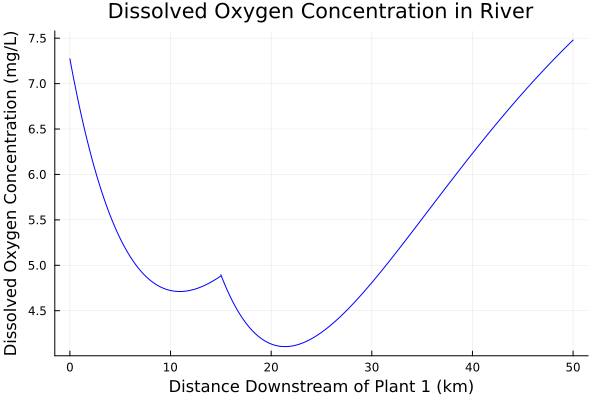

In [22]:
# plotting DO using the two resultant vectors and the distance vectors
plot(
    [x1, d1 .+ x2],
    [C1, C2],
    title = "Dissolved Oxygen Concentration in River",
    xlabel = "Distance Downstream of Plant 1 (km)",
    ylabel = "Dissolved Oxygen Concentration (mg/L)",
    color = "blue",
    label = ""
)

### Problem 4 (5 points)

What is the minimum level of treatment (% removal of organic waste) for
waste stream 2 that will ensure that the dissolved oxygen concentration
never drops below 4 mg/L, assuming that waste stream 1 remains
untreated?

In [13]:
# define scenarion variables
Cs = 10; # mg/L, saturation level of water

# units for k variables are day^-1. They are reareation/decay constants
k_a = 0.55;
k_c = 0.35;
k_n = 0.25;

u = 6; # river velocity, km/day

# q variables are L/day, flow of input streams
qr = 100000;
q1 = 10000;
q2 = 15000;

# DO variables are mg/L, concentration of input streams
dor = 7.5;
do1 = 5;
do2 = 5;

# NBOD values for all inputs, units are mg/L
nr = 5;
n1 = 35;
n2 = 35;

# CBOD values for all inputs, units are mg/L
br = 5;
b1 = 50;
b2 = 45;

# these were calculated by hand but could be found numerically using above variables
C0 = 7.2727; # mg/L, saturation at x=0 (influx of waste 1)
B0 = 9.0909; # mg/L, CBOD at x=0
N0 = 7.7273; # mg/L, NBOD at x=0

function dissolved_oxygen(x, Cs, C0, B0, N0, k_a, k_c, k_n, u)
    alpha1 = exp(-k_a*x/u);
    alpha2 = (k_c/(k_a-k_c))*(exp(-k_c*x/u)-alpha1);
    alpha3 = (k_n/(k_a-k_n))*(exp(-k_n*x/u)-alpha1);
    C = (Cs*(1-alpha1))+(C0*alpha1)-(B0*alpha2)-(N0*alpha3);
    return C
end


# distances between plants and to end of sim
d1 = 15;
d2 = 50;

x_step = 0.1;
x1 = 0:x_step:d1;
x2 = 0:x_step:d2-d1;

C1 = zeros(length(x1));
# plot DO in river between plants 1 and 2 ("x1")
for (i,y) in pairs(x1)
    C1[i] = dissolved_oxygen(y, Cs, C0, B0, N0, k_a, k_c, k_n, u)
end

# recalculate C0, B0, N0, and other base values using derived values from end of x1
qcomb = qr + q1;
C01 = (last(C1)*qcomb + do2*q2)/(qcomb + q2);
N01 = ((N0*exp(-k_a*d1/u))*qcomb + n2*q2)/(qcomb + q2);
B01 = ((B0*exp(-k_c*d1/u))*qcomb + b2*q2)/(qcomb + q2);

C2 = zeros(length(x2));
# plot DO in river after passing plant 2 until 50 km downstream from plant 1 (35 down from plant 2)
for (i,y) in pairs(x2)
    C2[i] = dissolved_oxygen(y, Cs, C01, B01, N01, k_a, k_c, k_n, u)
end

# keep scaling down the NBOD and CBOD of Plant 2 by 1% of their current value until DO sits above 4
while minimum(C2) < 4.5
    n2 = n2*0.99;   
    b2 = b2*0.99; 

    C1 = zeros(length(x1));
    # plot DO in river between plants 1 and 2 ("x1")
    for (i,y) in pairs(x1)
        C1[i] = dissolved_oxygen(y, Cs, C0, B0, N0, k_a, k_c, k_n, u)
    end

    # recalculate C0, B0, N0, and other base values using derived values from end of x1
    qcomb = qr + q1;
    C01 = (last(C1)*qcomb + do2*q2)/(qcomb + q2);
    N01 = ((N0*exp(-k_a*d1/u))*qcomb + n2*q2)/(qcomb + q2);
    B01 = ((B0*exp(-k_c*d1/u))*qcomb + b2*q2)/(qcomb + q2);

    C2 = zeros(length(x2));
    # plot DO in river after passing plant 2 until 50 km downstream from plant 1 (35 down from plant 2)
    for (i,y) in pairs(x2)
        C2[i] = dissolved_oxygen(y, Cs, C01, B01, N01, k_a, k_c, k_n, u)
    end
end
  
# print values of new NBOD and CBOD, respectively, at plant 2 as percentages of original values
println(100*n2/35)
println(100*b2/45)



78.56781408072189
78.5678140807219


According to my simulation, no change would need to be made to see a minimum DO level of 4 mg/L. However, the above code will solve for the change in the NBOD and CBOD at Plant 2 to find that scenario if it were not already achieved.

### Problem 5 (5 points)

If both waste streams are treated equally, what is the minimum level of
treatment (% removal of organic waste) for the two sources required to
ensure that the dissolved oxygen concentration never drops below 4 mg/L?

In [ ]:
# define scenarion variables
Cs = 10; # mg/L, saturation level of water

# units for k variables are day^-1. They are reareation/decay constants
k_a = 0.55;
k_c = 0.35;
k_n = 0.25;

u = 6; # river velocity, km/day

# q variables are L/day, flow of input streams
qr = 100000;
q1 = 10000;
q2 = 15000;

# DO variables are mg/L, concentration of input streams
dor = 7.5;
do1 = 5;
do2 = 5;

# NBOD values for all inputs, units are mg/L
nr = 5;
n1 = 35;
n2 = 35;

# CBOD values for all inputs, units are mg/L
br = 5;
b1 = 50;
b2 = 45;

# these were calculated by hand but could be found numerically using above variables
C0 = 7.2727; # mg/L, saturation at x=0 (influx of waste 1)
B0 = 9.0909; # mg/L, CBOD at x=0
N0 = 7.7273; # mg/L, NBOD at x=0

function dissolved_oxygen(x, Cs, C0, B0, N0, k_a, k_c, k_n, u)
    alpha1 = exp(-k_a*x/u);
    alpha2 = (k_c/(k_a-k_c))*(exp(-k_c*x/u)-alpha1);
    alpha3 = (k_n/(k_a-k_n))*(exp(-k_n*x/u)-alpha1);
    C = (Cs*(1-alpha1))+(C0*alpha1)-(B0*alpha2)-(N0*alpha3);
    return C
end


# distances between plants and to end of sim
d1 = 15;
d2 = 50;

x_step = 0.1;
x1 = 0:x_step:d1;
x2 = 0:x_step:d2-d1;

C1 = zeros(length(x1));
# plot DO in river between plants 1 and 2 ("x1")
for (i,y) in pairs(x1)
    C1[i] = dissolved_oxygen(y, Cs, C0, B0, N0, k_a, k_c, k_n, u)
end

# recalculate C0, B0, N0, and other base values using derived values from end of x1
qcomb = qr + q1;
C01 = (last(C1)*qcomb + do2*q2)/(qcomb + q2);
N01 = ((N0*exp(-k_a*d1/u))*qcomb + n2*q2)/(qcomb + q2);
B01 = ((B0*exp(-k_c*d1/u))*qcomb + b2*q2)/(qcomb + q2);

C2 = zeros(length(x2));
# plot DO in river after passing plant 2 until 50 km downstream from plant 1 (35 down from plant 2)
for (i,y) in pairs(x2)
    C2[i] = dissolved_oxygen(y, Cs, C01, B01, N01, k_a, k_c, k_n, u)
end

# keep scaling down the NBOD and CBOD of Plant 1 and 2 by 1% of their current value until DO sits above 4
while minimum(C2) < 4.5
    n1 = n1*0.99
    b1 = n2*0.99
    
    n2 = n2*0.99;   
    b2 = b2*0.99; 

    C1 = zeros(length(x1));
    # plot DO in river between plants 1 and 2 ("x1")
    for (i,y) in pairs(x1)
        C1[i] = dissolved_oxygen(y, Cs, C0, B0, N0, k_a, k_c, k_n, u)
    end

    # recalculate C0, B0, N0, and other base values using derived values from end of x1
    qcomb = qr + q1;
    C01 = (last(C1)*qcomb + do2*q2)/(qcomb + q2);
    N01 = ((N0*exp(-k_a*d1/u))*qcomb + n2*q2)/(qcomb + q2);
    B01 = ((B0*exp(-k_c*d1/u))*qcomb + b2*q2)/(qcomb + q2);

    C2 = zeros(length(x2));
    # plot DO in river after passing plant 2 until 50 km downstream from plant 1 (35 down from plant 2)
    for (i,y) in pairs(x2)
        C2[i] = dissolved_oxygen(y, Cs, C01, B01, N01, k_a, k_c, k_n, u)
    end
end
  
# print values of new NBOD and CBOD, respectively, at plant 2 as percentages of original values
println(100*n1/35)
println(100*b1/50)
println(100*n2/35)
println(100*b2/45)

The code above extends the previous solution to the option of treating both plants at the same rate.

### Problem 6 (5 points)

Suppose you are responsible for designing a waste treatment plan for
discharges into the river, with a regulatory mandate to keep the
dissolved oxygen concentration above 4 mg/L. Discuss whether you’d opt
to treat waste stream 2 alone or both waste streams equally. What other
information might you need to make a conclusion, if any?

I would opt to treat waste stream 2 more than stream 1. This is due to the fact that the lowest DO level is usually found after the 2nd waste stream. Of course, this is largely based in the assumption that the two waste streams have roughly comparable outputs. If the 1st waste stream was much more impactful, it would make more sense to treat waste stream 1.

### Problem 7 (5 points)

Suppose that it is known that the DO concentrations at the river inflow
can vary uniformly between 6 mg/L and 8 mg/L. How often will the
treatment plan identified in Problem 5 (both waste streams treated
equally) fail to comply with the regulatory standard?

In [ ]:
# define scenarion variables
Cs = 10; # mg/L, saturation level of water

# units for k variables are day^-1. They are reareation/decay constants
k_a = 0.55;
k_c = 0.35;
k_n = 0.25;

u = 6; # river velocity, km/day

# q variables are L/day, flow of input streams
qr = 100000;
q1 = 10000;
q2 = 15000;

# DO variables are mg/L, concentration of input streams
dor = 7.5;
do1 = 5;
do2 = 5;

# NBOD values for all inputs, units are mg/L
nr = 5;
n1 = 35;
n2 = 35;

# CBOD values for all inputs, units are mg/L
br = 5;
b1 = 50;
b2 = 45;

# these were calculated by hand but could be found numerically using above variables
C0 = 7.2727; # mg/L, saturation at x=0 (influx of waste 1)
B0 = 9.0909; # mg/L, CBOD at x=0
N0 = 7.7273; # mg/L, NBOD at x=0

function dissolved_oxygen(x, Cs, C0, B0, N0, k_a, k_c, k_n, u)
    alpha1 = exp(-k_a*x/u);
    alpha2 = (k_c/(k_a-k_c))*(exp(-k_c*x/u)-alpha1);
    alpha3 = (k_n/(k_a-k_n))*(exp(-k_n*x/u)-alpha1);
    C = (Cs*(1-alpha1))+(C0*alpha1)-(B0*alpha2)-(N0*alpha3);
    return C
end


# distances between plants and to end of sim
d1 = 15;
d2 = 50;

x_step = 0.1;
x1 = 0:x_step:d1;
x2 = 0:x_step:d2-d1;

C1 = zeros(length(x1));
# plot DO in river between plants 1 and 2 ("x1")
for (i,y) in pairs(x1)
    C1[i] = dissolved_oxygen(y, Cs, C0, B0, N0, k_a, k_c, k_n, u)
end

# recalculate C0, B0, N0, and other base values using derived values from end of x1
qcomb = qr + q1;
C01 = (last(C1)*qcomb + do2*q2)/(qcomb + q2);
N01 = ((N0*exp(-k_a*d1/u))*qcomb + n2*q2)/(qcomb + q2);
B01 = ((B0*exp(-k_c*d1/u))*qcomb + b2*q2)/(qcomb + q2);

C2 = zeros(length(x2));
# plot DO in river after passing plant 2 until 50 km downstream from plant 1 (35 down from plant 2)
for (i,y) in pairs(x2)
    C2[i] = dissolved_oxygen(y, Cs, C01, B01, N01, k_a, k_c, k_n, u)
end

# define number of trials and preallocate minimum vector
trialno = 1000;
mindolevels = zeros(length(x1)+length(x2))

# keep scaling down the NBOD and CBOD of Plant 2 by 1% of their current value until DO sits above 4
for i in 1:trialno
     
    C1 = zeros(length(x1));
    # plot DO in river between plants 1 and 2 ("x1")
    for (i,y) in pairs(x1)
        C1[i] = dissolved_oxygen(y, Cs, C0, B0, N0, k_a, k_c, k_n, u)
    end

    # recalculate C0, B0, N0, and other base values using derived values from end of x1
    qcomb = qr + q1;
    C01 = (last(C1)*qcomb + do2*q2)/(qcomb + q2);
    N01 = ((N0*exp(-k_a*d1/u))*qcomb + n2*q2)/(qcomb + q2);
    B01 = ((B0*exp(-k_c*d1/u))*qcomb + b2*q2)/(qcomb + q2);

    C2 = zeros(length(x2));
    # plot DO in river after passing plant 2 until 50 km downstream from plant 1 (35 down from plant 2)
    for (i,y) in pairs(x2)
        C2[i] = dissolved_oxygen(y, Cs, C01, B01, N01, k_a, k_c, k_n, u)
    end

    mindolevels[i] = minimum([minimum(C1), minimum(C2)])

end

# Check how many scenarios end up above 4 mg/L at all times
legalno = 0;
for i in 1:trialno
    if mindolevels[i] > 4
        legalno = legalno + 1;
    end
end


percentlegal = legalno/trialno;
println(percentlegal)

The above code will run n scenarios and test how many of them end up above 4 mg/L at minimum.

### Problem 8 (5 points)

A factory is planning a third wastewater discharge into the river
downstream of the second plant. This discharge would consist of 5
m<sup>3</sup>/day of wastewater with a dissolved oxygen content of 4.5
mg/L and CBOD and NBOD levels of 50 and 45 mg/L, respectively.

Assume that the treatment plan you identified in Problem 5 is still in
place for the existing discharges. If the third discharge will not be
treated, under the original inflow conditions (7.5 mg/L DO), how far
downstream from the second discharge does this third discharge need to
be placed to keep the river concentration from dropping below 4 mg/L?

## References

List any external references consulted, including classmates.

Consulted Prof. Srikrishnan during office hours 9/21.